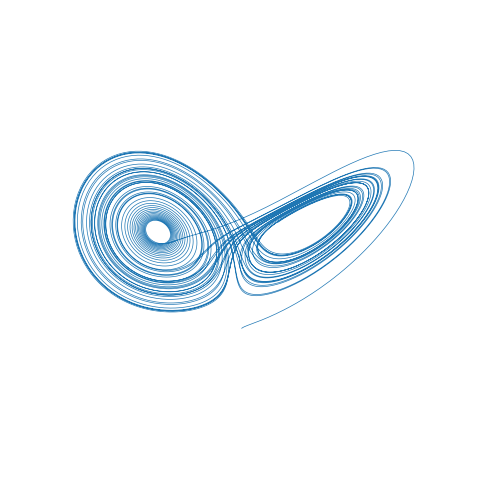

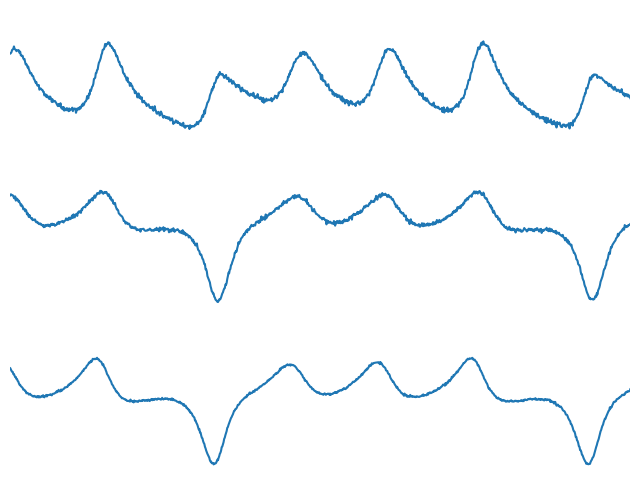

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D projection

# Parameters for the Lorenz system
sigma = 10.0
rho = 28.0
beta = 8.0/3.0

# Lorenz system equations
def lorenz(state, t, sigma, rho, beta):
    x, y, z = state
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta*z
    return [dx, dy, dz]

# Initial conditions and time array
initial_state = [1.0, 1.0, 1.0]
t = np.linspace(0, 50, 10000)  # longer time for a nicer trajectory

# Solve the ODE
solution = odeint(lorenz, initial_state, t, args=(sigma, rho, beta))
x = solution[:,0]
y = solution[:,1]
z = solution[:,2]

# --- First plot: 3D Lorenz trajectory ---
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_axis_off()

plt.savefig('lorenz.pdf')
plt.show()

# --- Second plot: "Noisy neurons" readout ---
# Define a random linear readout matrix (3 neurons reading out from x,y,z)
np.random.seed(42)  # for reproducibility
M = np.random.randn(3, 3)  # Each neuron is a linear combination of x,y,z

# Compute the linear readout
neuron_activity = solution @ M.T

# Add some Gaussian noise
noise_std = 0.4
noise = noise_std * np.random.randn(*neuron_activity.shape)
neuron_activity_noisy = neuron_activity + noise

# Plot the three neurons' activity over time
fig2, ax2 = plt.subplots(nrows = 3, ncols=1,figsize=(8,6))
for i in range(3):
    ax2[i].plot(t, neuron_activity_noisy[:,i], label='Neuron {}'.format(i+1))
    ax2[i].set_xlim([20, 25])
    ax2[i].set_axis_off()
plt.savefig('lorenz_neurons.pdf')
plt.show()
